In [55]:
import numpy as np
from mpmath import *
import matplotlib.pyplot as plt

In [56]:
hbar = 1.0545718e-34
tau = 31e-12 # 31 ps, this number is from Mike's note
f0 = 12.64281e9
# f_rep = 119.596011e6 # Cryo
# f_rep = 118.92876e6
f_rep = 117.8011e6 # Red chamber
x = (f0 % f_rep)/f_rep
n = f0 // f_rep
print('n = '+str(n)+'; x = '+str(x) )

def h(k):
    if k == 0:
        return 1
    else:
        return k*f_rep*tau*np.pi*csch(k*np.pi*f_rep*tau)

def Xi1(x, counts = 5000):
    ks = np.linspace(-counts, counts, 2*counts+1)
    Xi = 0
    for k in ks:
        if x == 0 and k == n:
            pass
        else:
            Xi = Xi + h(k)**2/(k-n-x)
            #Xi = Xi + 1/(k-n-x) # ideal case: the pulse is infinitesimally short
    return Xi

def Xi2(x, f_A, counts = 1000):
    ks = np.linspace(-counts, counts, 2*counts+1)
    Xi = 0
    tol = 1e-6
    for k in ks:
        if k == n: # If f_A = x*f_rep
#         if k == n+1: # If f_A = (1-x)*f_rep
            pass
        else:
            Xi = Xi + 0.5* h(k)**2*(1/(k-n-x+f_A/f_rep)+1/(k-n-x-f_A/f_rep))
    return Xi

n = 107.0; x = 0.3233611570689917


In [34]:
h(n)

mpf('0.78692474482699093')

In [4]:
Xi1(0.1, counts = 5000)

mpf('-7.7296241056754402')

In [5]:
Xi1(0.1, counts = 10000)

mpf('-7.7296241056754402')

In [6]:
Xi1(0.1, counts = 20000)

mpf('-7.7296241056754402')

In [7]:
Xi2(0.1, 0.1*f_rep, counts = 300)

mpf('-1.5390429012020488')

In [8]:
Xi2(0.1, 0.1*f_rep, counts = 1000)

mpf('-1.5338632577353488')

In [9]:
Xi2(0.1, 0.1*f_rep, counts = 2000)

mpf('-1.5338632573080608')

(-20, 20)

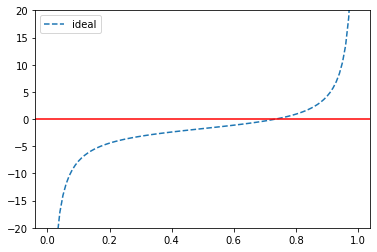

In [57]:
xs = np.linspace(0.01,0.99,99)
Xi1s = []

for x in xs:
    Xi1s.append(Xi1(x))
    
plt.plot(xs, Xi1s, '--', label='ideal')
# plt.plot(xs, relative_delta1s, label='delta_1')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.ylim(-20,20)

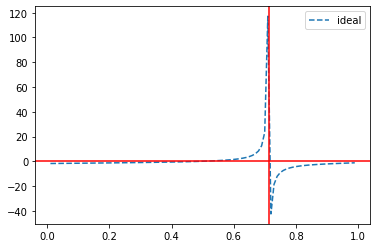

In [58]:
xs = np.linspace(0.01,0.99,99)
Xi2s = []

for x in xs:
    Xi2s.append(Xi2(x,(1-0.7126)*f_rep))
    
plt.plot(xs, Xi2s, '--', label='ideal')
# plt.plot(xs, relative_delta1s, label='delta_1')
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x = 0.7126, color='r', linestyle='-')
plt.legend()


# Stark shift in single-qubit rotation with one comb

$\delta^{(1)} = \delta_{1,1}*\xi_1(0)$, where 
$$
\delta_{1,1} = -\frac{|\Omega_{1,1}|^2}{2\pi f_{rep}}\\
\Omega_{1,1} = |S_1| I_1 |\Omega_0|\\
\Omega_0 = \frac{|\textbf{d}_0\cdot\hat{\sigma}_+|^2}{3\hbar^2}\frac{\omega_p}{\Delta(\Delta-\omega_p)}
$$

In [69]:
pi_time = 7.6e-6
Omega = np.pi/pi_time/2
delta0 = -Omega**2/(2*np.pi*f_rep)
delta0

-57.714289731705776

In [70]:
Omega

206683.7272098548

In [51]:
def shift_single_beam(delta, x):
    return delta*Xi1(x)

def shift_both_beam(delta, x, fA):
    return delta*2*Xi2(x, fA)

# Stark shift data from Red chamber

[1730.0142314089023, 1399.7677244932192, 1137.1620683915921, 904.3979641196953, 724.0754135965778, 553.4613146020661, 411.41552789254945]
[0.008488885078322699, 0.010186662093987237, 0.011884439109651777, 0.013582216125316317, 0.015279993140980856, 0.016977770156645398, 0.018675547172309934]


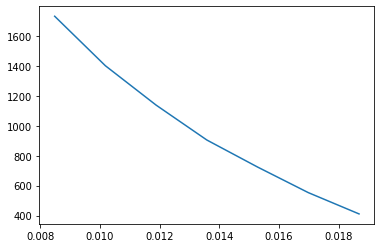

In [44]:
detunning = [1e6, 1.2e6, 1.4e6, 1.6e6, 1.8e6, 2.0e6, 2.2e6]
delta_phi = [2.174, 1.759, 1.429, 1.1365, 0.9099, 0.6955, 0.517]
waiting_time = 200e-6
stark_shift = []
xx = [delta/f_rep for delta in detunning]
for delta in delta_phi:
    stark_shift.append(delta/waiting_time/(2*np.pi)) # frequency, not angular frequency
print(stark_shift)
print(xx)
plt.plot(xx, stark_shift)

In [68]:
def calOmega(delta, ss):
    return np.sqrt(ss*4*delta)
for i in range(len(detunning)):
    print(calOmega(detunning[i],stark_shift[i]))

83186.87952817806
81968.8055150705
79800.42345121306
76079.87230776646
72203.4831424036
66540.89356791452
60170.23055842844


In [71]:
delta_gg = delta0*0.5
delta_ii = delta0*0.1
delta_gi = delta0
x = 0.3233611570689917
fA = x*f_rep-10e6
starkshift_gg = shift_single_beam(delta_gg, x)
starkshift_ii = shift_single_beam(delta_ii, x)
starkshift_gi = shift_both_beam(delta_gi, x, fA)
starkshift = starkshift_gg + starkshift_ii + starkshift_gi
print('delta_0 =', delta0)
print('starkshift_gg =', starkshift_gg)
print('starkshift_ii =', starkshift_ii)
print('starkshift_gi =', starkshift_gi)
print('starkshift =', starkshift)

delta_0 = -57.714289731705776
starkshift_gg = 85.1867822844129
starkshift_ii = 17.0373564568826
starkshift_gi = 90.9059132595467
starkshift = 193.130052000842


In [53]:
from tqdm import tqdm

100%|██████████| 50/50 [00:25<00:00,  1.95it/s]


(-500, 500)

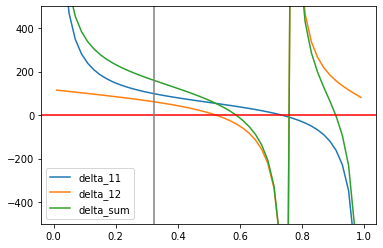

In [54]:
xs = np.linspace(0.01,0.99,50)
delta11 = []
delta12 = []

fA = x*f_rep-10e6
for x in tqdm(xs):
    delta11.append(shift_single_beam(delta0, x))
    delta12.append(shift_both_beam(delta_gi, x, fA))
    
plt.plot(xs, delta11, label='delta_11')
plt.plot(xs, delta12, label='delta_12')
plt.plot(xs, np.array(delta11)+np.array(delta12), label='delta_sum')
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=0.3234, color='grey', linestyle='-')
plt.legend()
plt.ylim(-500,500)